<a href="https://colab.research.google.com/github/sanaghani12/DPS-Code-Task/blob/main/PredictorModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

df = pd.read_csv("/content/drive/MyDrive/Data/220511_monatszahlenmonatszahlen2204_verkehrsunfaelle.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
df = df[['MONATSZAHL', 'AUSPRAEGUNG','JAHR','MONAT','WERT']]
df = df.dropna()
df = df[df.MONAT != 'Summe']
df[['MONAT']] = df[['MONAT']].apply(lambda x: x.str[-2:])
print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1848 entries, 13 to 2085
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MONATSZAHL   1848 non-null   object 
 1   AUSPRAEGUNG  1848 non-null   object 
 2   JAHR         1848 non-null   int64  
 3   MONAT        1848 non-null   object 
 4   WERT         1848 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 86.6+ KB
None
        MONATSZAHL AUSPRAEGUNG  JAHR MONAT  WERT
13  Alkoholunfälle   insgesamt  2021    01  16.0
14  Alkoholunfälle   insgesamt  2021    02  14.0
15  Alkoholunfälle   insgesamt  2021    03  24.0
16  Alkoholunfälle   insgesamt  2021    04  16.0
17  Alkoholunfälle   insgesamt  2021    05  24.0
18  Alkoholunfälle   insgesamt  2021    06  48.0
19  Alkoholunfälle   insgesamt  2021    07  44.0
20  Alkoholunfälle   insgesamt  2021    08  46.0
21  Alkoholunfälle   insgesamt  2021    09  54.0
22  Alkoholunfälle   insgesamt  2021    1

In [148]:
X = df[['MONATSZAHL', 'AUSPRAEGUNG', 'MONAT']]
y = df['WERT']
X = pd.get_dummies(data=X,columns=["MONATSZAHL", "AUSPRAEGUNG","MONAT"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1478, 18)
(370, 18)
(1478,)
(370,)


Mean Absolute Error: 477.8324324324324
Mean Squared Error: 339848.6
Root Mean Squared Error: 582.9653505998448
0.7244672683062731
predicted value:  [584]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


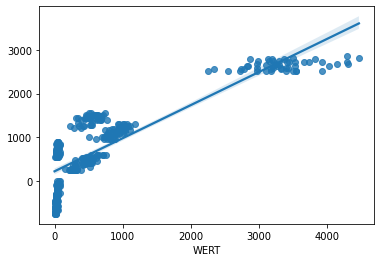

In [149]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(regressor.score(X_test,y_test))

sns.regplot(y_test,y_pred) #regression graph plot

new_input = [[1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0]]
y_pred = regressor.predict(new_input)
print("predicted value: ",y_pred.astype('int'))